Planilhas disponíveis: ['movie_final']

Informações do dataset após limpeza:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rank           994 non-null    int64  
 1   Series_Title   994 non-null    object 
 2   Released_Year  994 non-null    object 
 3   Certificate    893 non-null    object 
 4   Runtime        994 non-null    float64
 5   Genre          994 non-null    object 
 6   IMDB_Rating    994 non-null    float64
 7   Overview       994 non-null    object 
 8   Meta_score     994 non-null    float64
 9   Director       994 non-null    object 
 10  Star1          994 non-null    object 
 11  Star2          994 non-null    object 
 12  Star3          994 non-null    object 
 13  Star4          994 non-null    object 
 14  No_of_Votes    994 non-null    float64
 15  Gross          994 non-null    float64
dtypes: float64(5), int64(

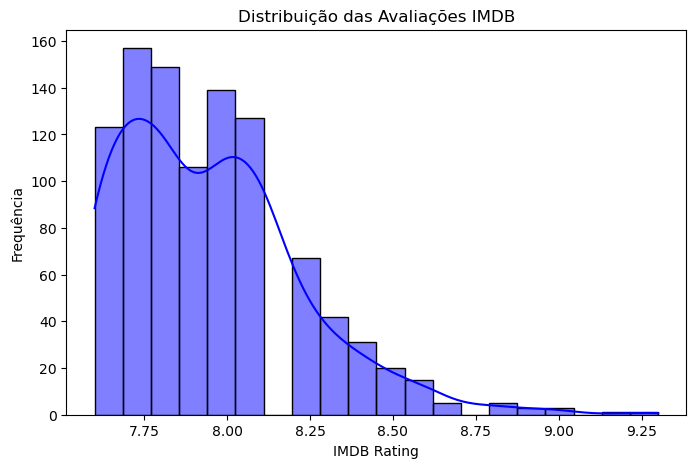


Top 10 Filmes com Maior Receita:
                                   Series_Title        Gross
473  Star Wars: Episode VII - The Force Awakens  936662225.0
59                            Avengers: Endgame  858373000.0
619                                      Avatar  760507625.0
60                       Avengers: Infinity War  678815482.0
648                                     Titanic  659325379.0
355                                The Avengers  623279547.0
885                               Incredibles 2  608581744.0
2                               The Dark Knight  534858444.0
578                                   Rogue One  532177324.0
63                        The Dark Knight Rises  448139099.0


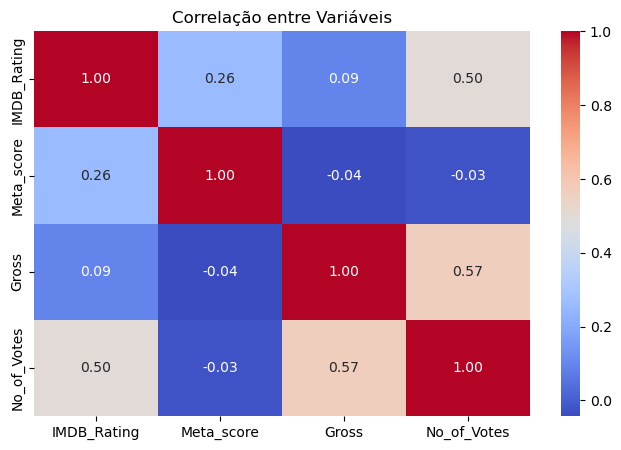

C:\Users\GonçaloTeixeira(1200\AppData\Local\Temp\ipykernel_15784\3855696599.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index[:10], y=genre_counts.values[:10], palette="viridis")


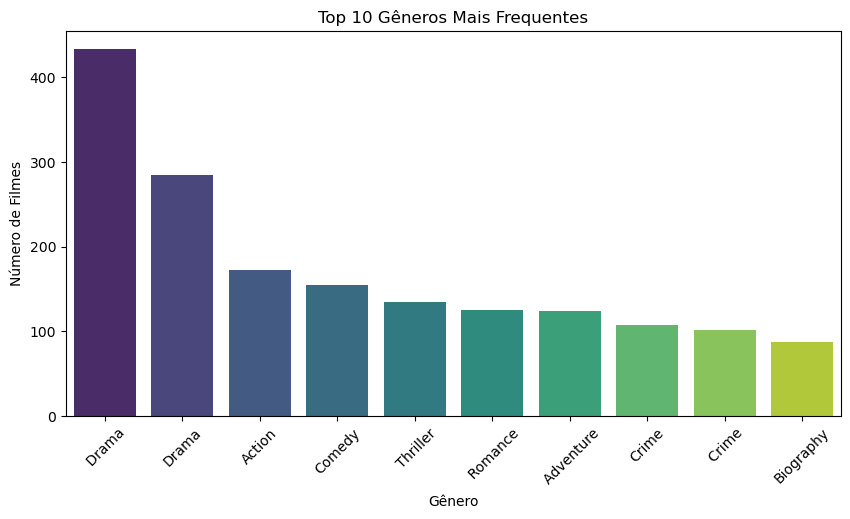

ValueError: Unable to parse string "PG" at position 99

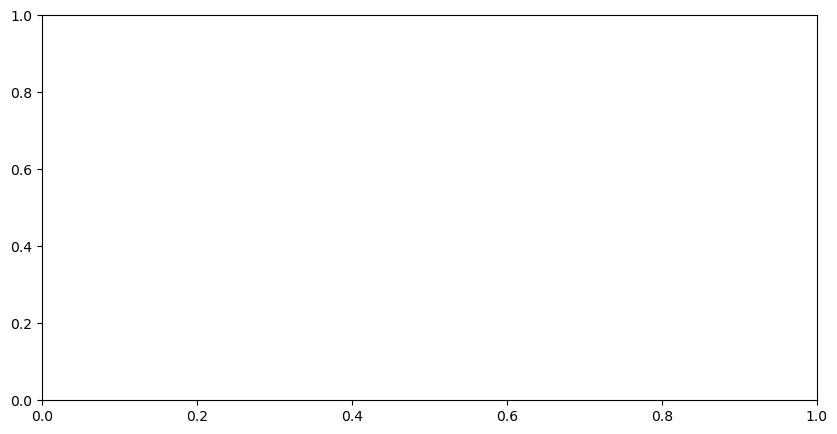

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caminho do arquivo
file_path = "movie_final.xlsx"

# Carregar o arquivo Excel
xls = pd.ExcelFile(file_path)

# Verificar as planilhas disponíveis
print("Planilhas disponíveis:", xls.sheet_names)

# Carregar a planilha principal
df = pd.read_excel(xls, sheet_name='movie_final')

# Remover espaços extras dos nomes das colunas
df.columns = df.columns.str.strip()

# Converter 'Runtime' de 'XX min' para número inteiro
df['Runtime'] = df['Runtime'].str.replace(' min', '', regex=True).astype(float)

# Converter 'Gross' para numérico, removendo vírgulas
df['Gross'] = df['Gross'].str.replace(',', '', regex=True).astype(float)

# Remover valores nulos para colunas essenciais
df.dropna(subset=['Released_Year', 'IMDB_Rating', 'Genre', 'Director'], inplace=True)

# Preencher valores nulos em colunas numéricas com a mediana
df.fillna({
    'Meta_score': df['Meta_score'].median(), 
    'Gross': df['Gross'].median(), 
    'No_of_Votes': df['No_of_Votes'].median()
}, inplace=True)

# Remover duplicados
df.drop_duplicates(inplace=True)

# Resetar o índice após remoção de linhas
df.reset_index(drop=True, inplace=True)

# Mostrar informações do dataset após o tratamento
print("\nInformações do dataset após limpeza:")
print(df.info())
print(df.head())

# ------------------- Exploração Inicial -------------------

# 1. Distribuição do IMDB Rating
plt.figure(figsize=(8, 5))
sns.histplot(df['IMDB_Rating'], bins=20, kde=True, color="blue")
plt.title("Distribuição das Avaliações IMDB")
plt.xlabel("IMDB Rating")
plt.ylabel("Frequência")
plt.show()

# 2. Top 10 filmes mais rentáveis
top_gross_movies = df[['Series_Title', 'Gross']].sort_values(by='Gross', ascending=False).head(10)
print("\nTop 10 Filmes com Maior Receita:")
print(top_gross_movies)

# 3. Correlação entre IMDB Rating, Meta Score, Gross e Votos
correlation_matrix = df[['IMDB_Rating', 'Meta_score', 'Gross', 'No_of_Votes']].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlação entre Variáveis")
plt.show()

# 4. Gêneros mais frequentes
genre_counts = df['Genre'].str.split(',').explode().value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=genre_counts.index[:10], y=genre_counts.values[:10], palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 Gêneros Mais Frequentes")
plt.xlabel("Gênero")
plt.ylabel("Número de Filmes")
plt.show()

# 5. Evolução da Média de IMDB Rating por Ano
df_year_rating = df.groupby('Released_Year')['IMDB_Rating'].mean().dropna()

plt.figure(figsize=(10, 5))
sns.lineplot(x=df_year_rating.index, y=df_year_rating.values, marker="o", color="red")
plt.title("Evolução da Média de IMDB Rating ao Longo dos Anos")
plt.xlabel("Ano de Lançamento")
plt.ylabel("Média do IMDB Rating")
plt.grid(True)
plt.show()
